# EDA мастер-датасета и логарифмирование признаков

В этом ноутбуке проводится визуальный анализ распределений всех числовых признаков финального мастер-датасета,  
а также создание логарифмированных версий ключевых метрик для дальнейшего анализа и моделирования.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
df = pd.read_csv("../../data/clean/master_dataset_2015_2020.csv")
df.head()

,year,poverty_percent,region,income_per_capita,real_income,nominal_wage,real_wage,children_percent,elderly_percent,working_age_percent,...,production_per_capita,poverty_welfare_ratio,birth_rate_per_1000,infant_mortality_rural_rate,infant_mortality_urban_rate,disabled_18_30_rate,disabled_31_40_rate,disabled_41_50_rate,disabled_51_60_rate,disabled_60_plus_rate
0,2015,8.5,Белгородская область,28043.0,99.3,25456.0,93.2,43.4,11.8,42.3,...,448.058152,0.752212,11.895859,2.351097,3.806538,3.626420,6.629519,10.233659,22.036901,95.349584
1,2016,8.1,Белгородская область,29799.0,100.8,27091.0,100.8,43.4,11.8,42.3,...,478.465681,0.686441,11.454064,2.085627,4.171253,3.613722,6.606304,10.197823,21.959734,95.015697
2,2017,7.8,Белгородская область,30342.0,99.1,29066.0,104.5,43.4,11.8,44.8,...,1038.799178,0.475610,10.020973,2.249719,2.845233,4.036161,6.805140,10.728634,24.144082,99.374206
3,2018,7.5,Белгородская область,30778.0,98.7,31852.0,106.8,44.8,12.9,42.3,...,1184.515803,0.480769,9.470209,2.304791,2.793686,3.700754,6.644624,10.249968,22.549401,95.918499
4,2019,7.8,Белгородская область,32352.0,100.6,34615.0,104.0,0.0,0.0,0.0,...,1240.585480,0.565217,8.718105,1.212306,1.742690,3.498617,6.516510,10.066210,21.199561,93.373011


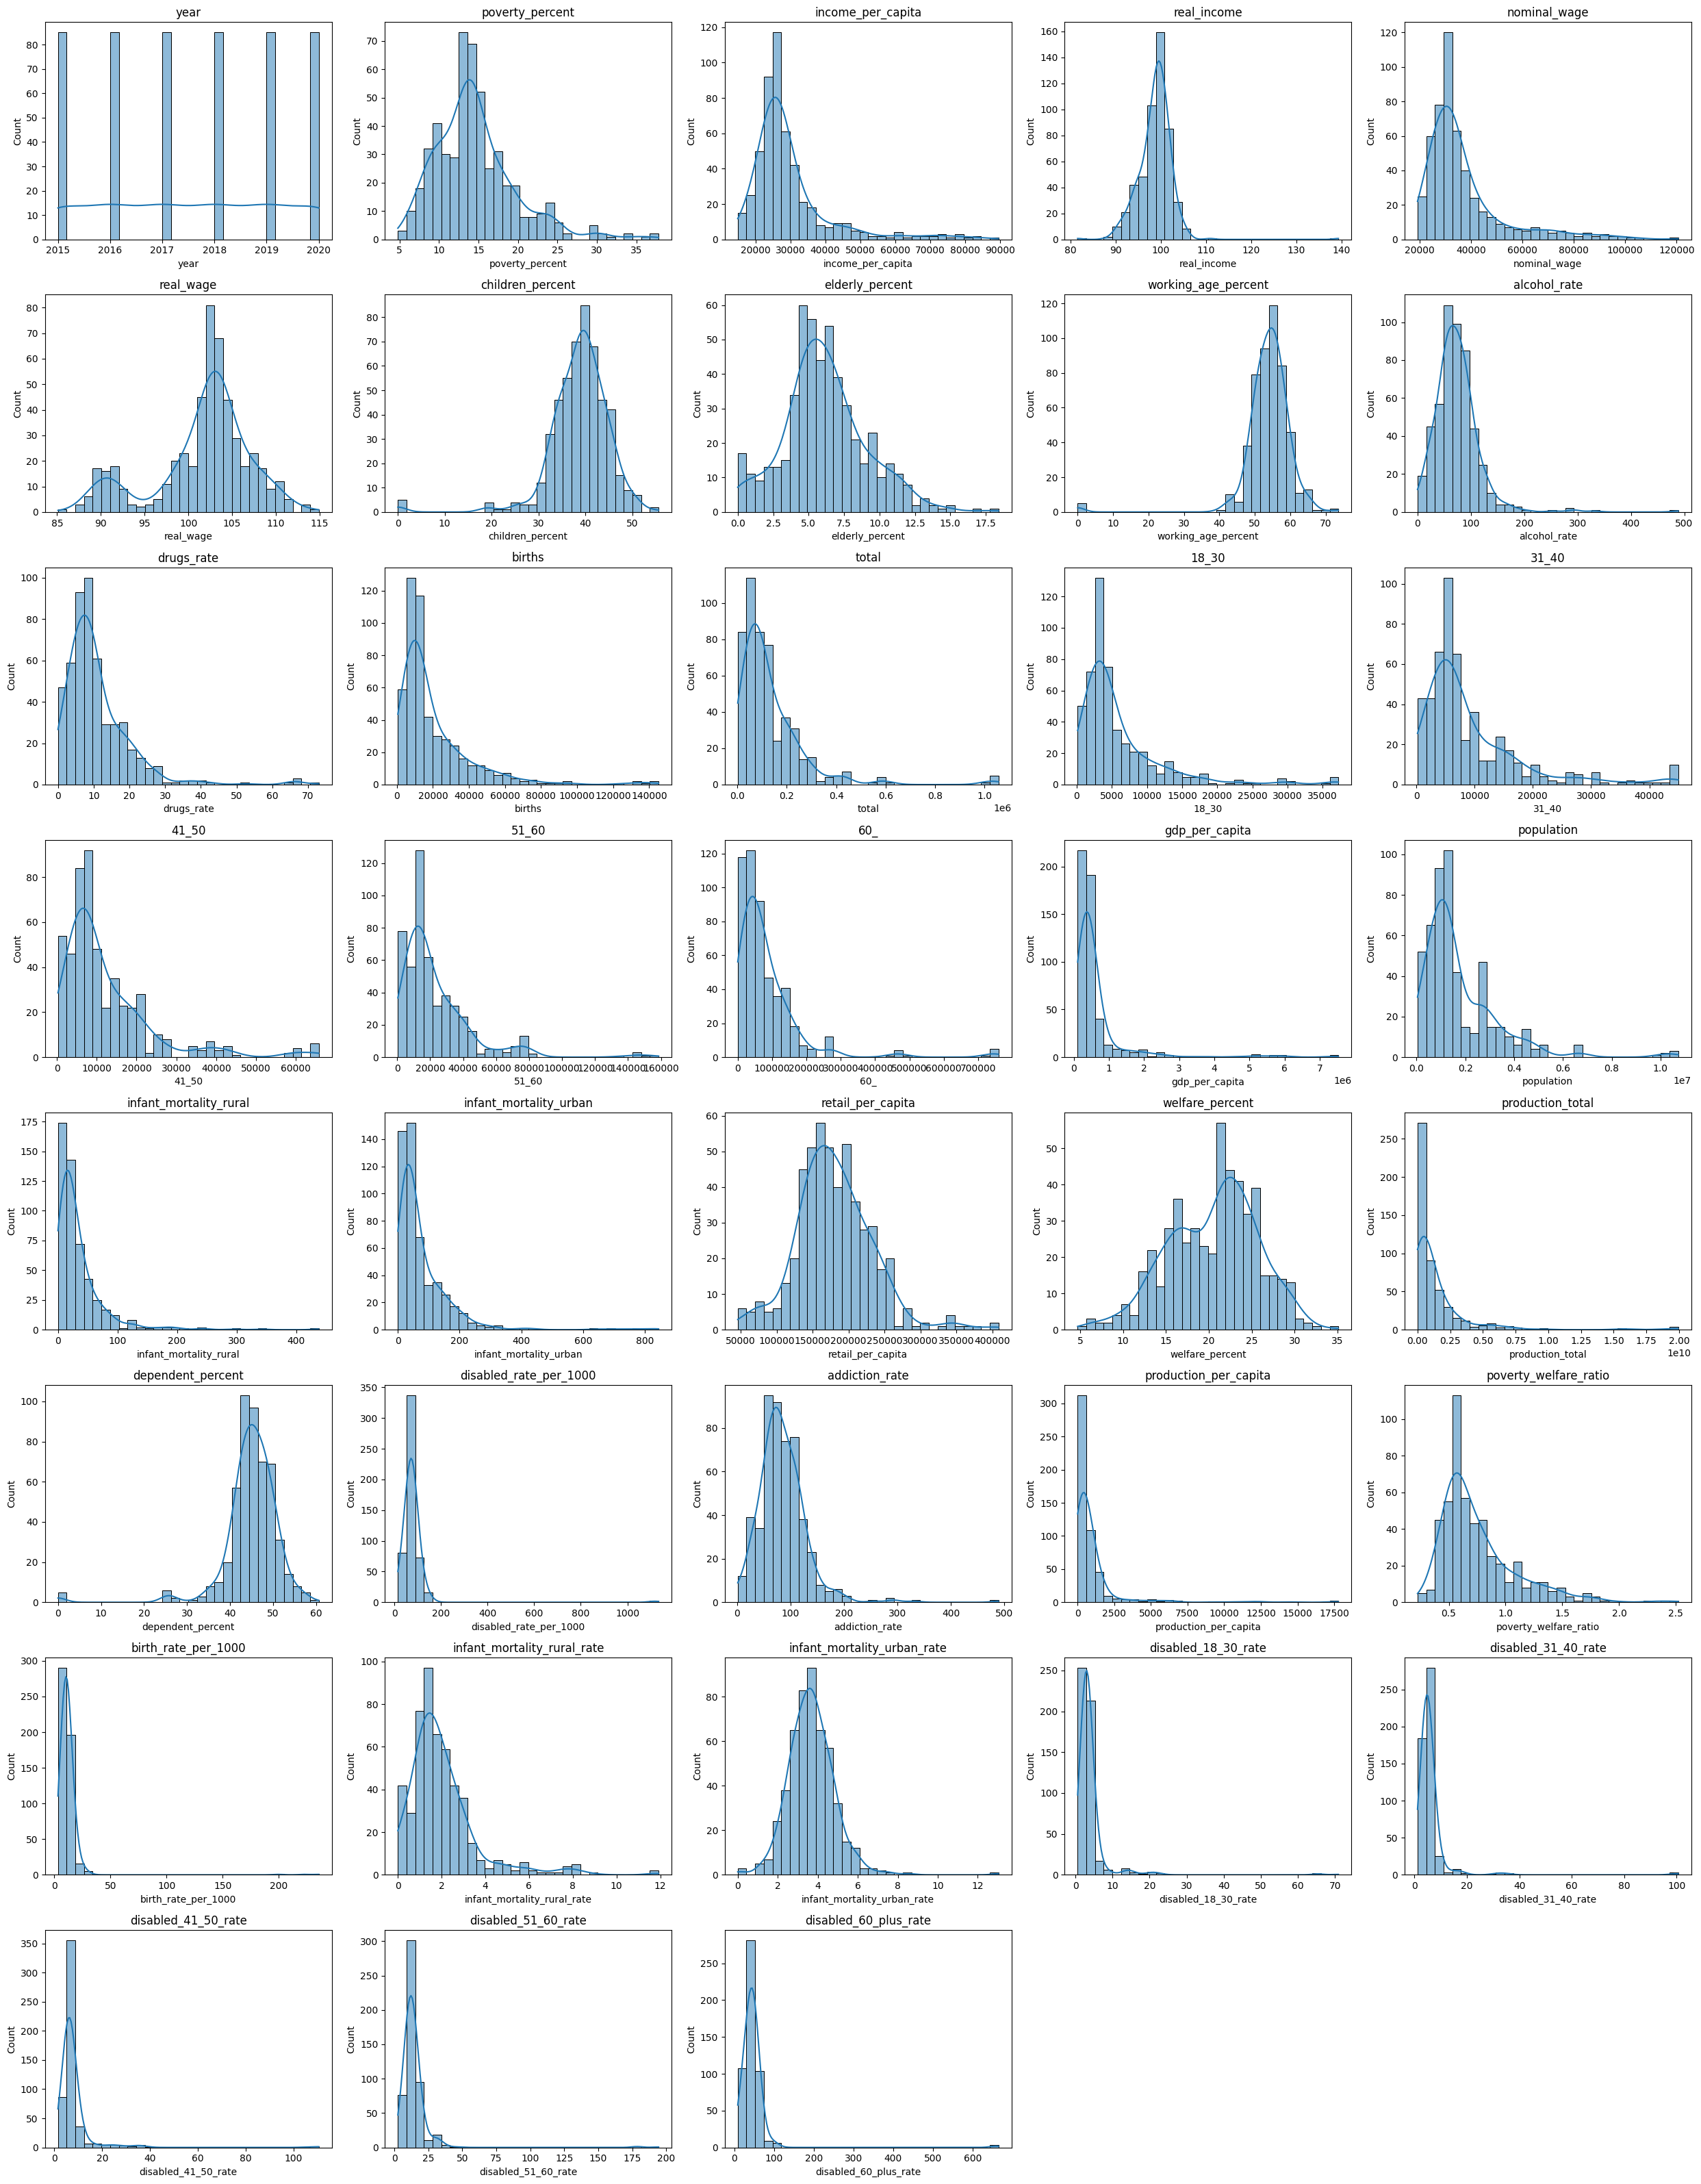

In [3]:
# Выбор всех числовых признаков 
num_cols = df.select_dtypes(include='number').columns

# Установка параметров сетки для графиков
n_cols = 5
n_rows = math.ceil(len(num_cols) / n_cols)

# Построение гистограмм
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [4]:
log_features = [
    # 📈 Экономика
    'income_per_capita', 'real_income', 'nominal_wage', 'real_wage',
    'gdp_per_capita', 'retail_per_capita', 'production_total', 'production_per_capita',

    # 👶 Население и рождаемость
    'births', 'population', 'birth_rate_per_1000',

    # 🧑‍🦽 Инвалиды (абсолют и нормированные)
    'total', '18_30', '31_40', '41_50', '51_60', '60_',
    'disabled_rate_per_1000',
    'disabled_18_30_rate', 'disabled_31_40_rate',
    'disabled_41_50_rate', 'disabled_51_60_rate', 'disabled_60_plus_rate',

    # 🧪 Здоровье и социальные проблемы
    'alcohol_rate', 'drugs_rate', 'addiction_rate',
    'infant_mortality_rural', 'infant_mortality_urban',
    'infant_mortality_rural_rate', 'infant_mortality_urban_rate'
]

for col in log_features:
    df[f"log_{col}"] = np.log1p(df[col])


In [5]:
# Сохраняем итоговый мастер-датасет
df.to_csv("../../data/clean/log_master_dataset_2015_2020.csv", index=False)

## Вывод по логарифмированию признаков

Большинство числовых признаков в датасете имеют **правостороннее распределение** и **большой масштаб**, что делает их чувствительными к выбросам и мешает корректной работе моделей.

### Логарифмированы признаки:
- **Экономика**: `income_per_capita`, `real_income`, `nominal_wage`, `real_wage`, `gdp_per_capita`, `retail_per_capita`, `production_total`, `production_per_capita`
- **Население**: `births`, `population`, `birth_rate_per_1000`
- **Инвалиды**: `total`, `18_30`, `31_40`, `41_50`, `51_60`, `60_`, `disabled_rate_per_1000`, `disabled_18_30_rate`, `disabled_31_40_rate`, `disabled_41_50_rate`, `disabled_51_60_rate`, `disabled_60_plus_rate`
- **Здоровье**: `alcohol_rate`, `drugs_rate`, `addiction_rate`, `infant_mortality_rural`, `infant_mortality_urban`, `infant_mortality_rural_rate`, `infant_mortality_urban_rate`


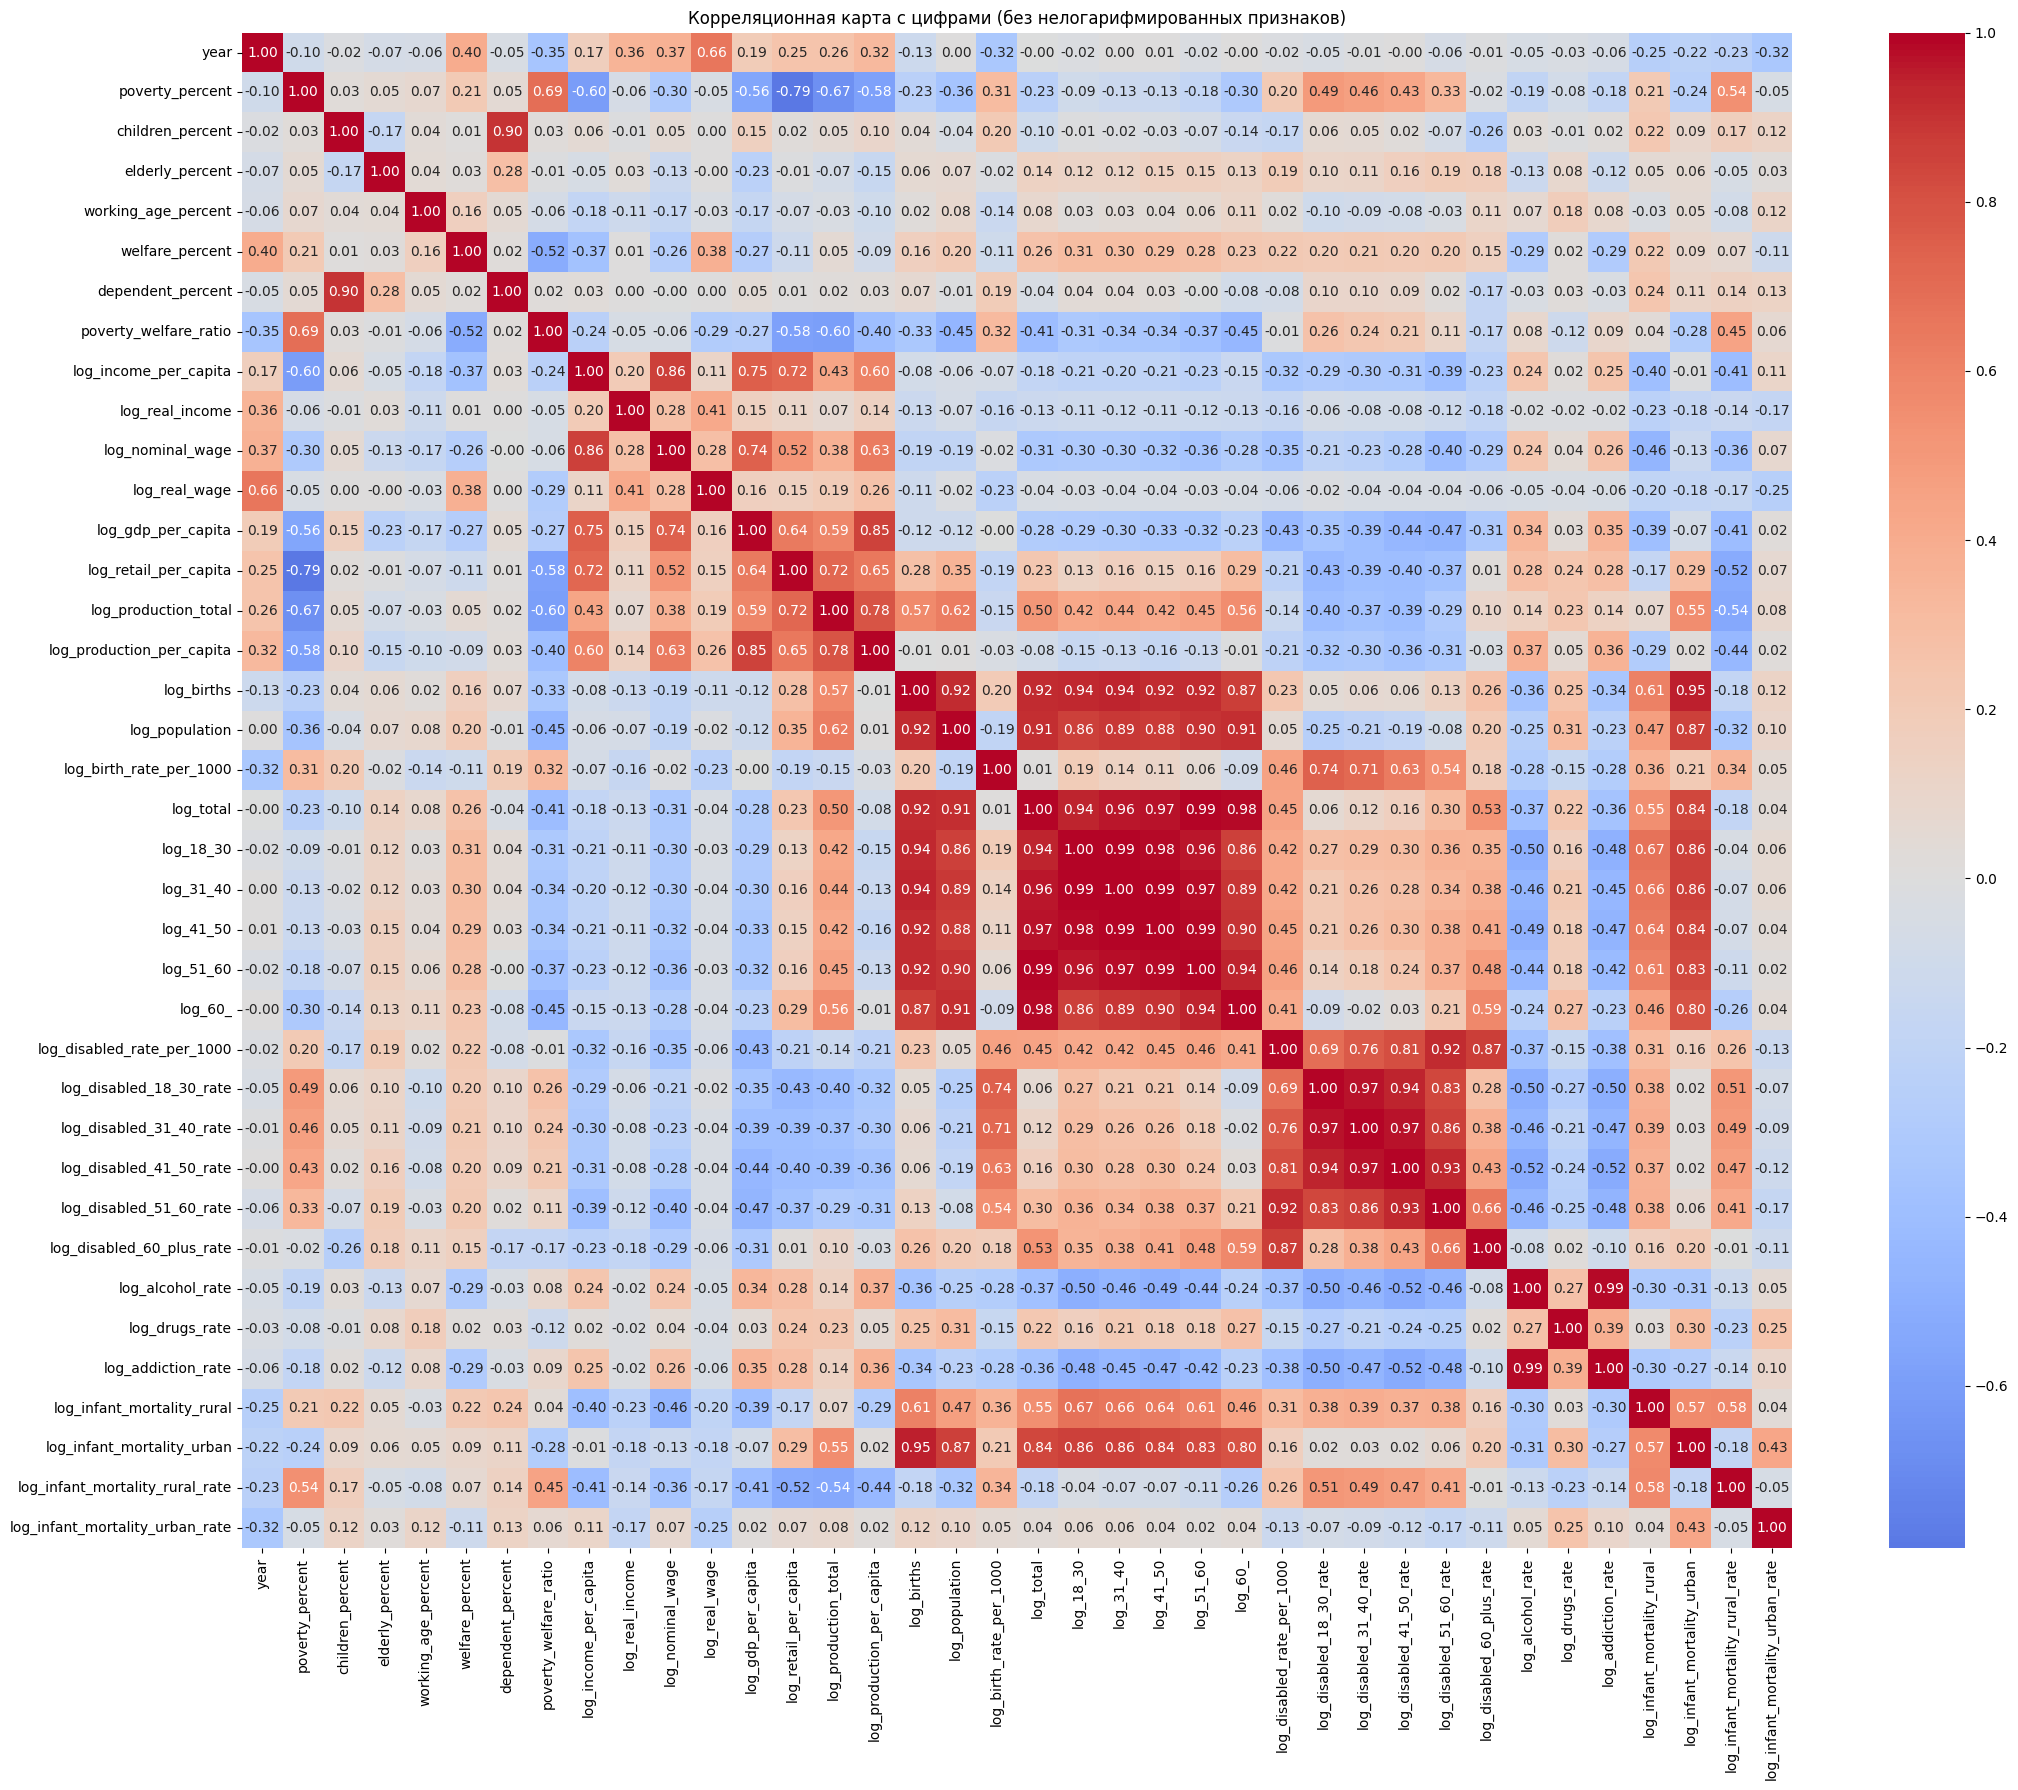

In [6]:
# Выбор логарифмированных признаков и удаление их оригиналов
log_features = [col for col in df.columns if col.startswith("log_")]
original_features = [col.replace("log_", "") for col in log_features if col.replace("log_", "") in df.columns]
df_filtered = df.drop(columns=original_features)

# Оставляем только числовые признаки
numeric_df = df_filtered.select_dtypes(include=["number"])

# Расчёт корреляционной матрицы
correlation_matrix = numeric_df.corr()

# Построение тепловой карты с цифрами
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Корреляционная карта с цифрами (без нелогарифмированных признаков)")
plt.tight_layout()
plt.show()


## Сравнение нормированных и ненормированных признаков по корреляции с бедностью

### Цель
Проверить, усиливает ли нормализация (например, деление на население) корреляцию признаков с целевой переменной `poverty_percent`.

---

### Основные выводы

- **Нормированные признаки почти всегда показывают более сильную (по модулю) корреляцию с бедностью.**
- Примеры значительного усиления связи:
  - `disabled_41_50_rate` → прирост по модулю: **+0.54**
  - `disabled_18_30_rate` → **+0.48**
  - `infant_mortality_rural_rate` → **+0.42**

---

### Почему это важно

- **Абсолютные значения (например, `total`, `births`) зависят от размера региона.**
  → Это маскирует реальные зависимости.
- **Нормировка устраняет влияние масштаба**, позволяя сравнивать регионы на равных.
- **Нормированные признаки лучше отражают социальную нагрузку на душу населения.**

---

### Вывод
Нормировка признаков по населению **обоснованна и полезна** — она усиливает сигналы, устраняет искажения и делает данные интерпретируемыми. Такие признаки стоит использовать при построении моделей и кластеризации.


## Анализ корреляций признаков с бедностью

### Цель
Понять, какие факторы наиболее сильно связаны с уровнем бедности (`poverty_percent`) и как это интерпретировать для анализа, построения модели и социальной политики.

---

### 1. Доходы и потребление
| Признак                  | Корреляция |
|--------------------------|------------|
| `log_retail_per_capita` | –0.79      |
| `retail_per_capita`     | –0.73      |
| `log_income_per_capita` | –0.60      |
| `income_per_capita`     | –0.50      |

**Вывод:**  
Чем выше доходы и потребление на душу населения, тем ниже уровень бедности. Это самые сильные по модулю корреляции, отражающие фундаментальные связи.

---

### 2. Производство и экономическая активность
| Признак                     | Корреляция |
|-----------------------------|------------|
| `log_production_total`     | –0.67      |
| `log_production_per_capita`| –0.58      |
| `log_gdp_per_capita`       | –0.56      |

**Вывод:**  
Чем выше производство и ВРП (особенно на душу населения), тем ниже бедность. Экономически активные регионы бедны реже.

---

### 3. Соцподдержка и её эффективность
| Признак                | Корреляция |
|------------------------|------------|
| `poverty_welfare_ratio`| +0.69      |
| `welfare_percent`      | +0.21      |

**Вывод:**  
Показатель `poverty_welfare_ratio` отражает, насколько бедность "опережает" уровень соцподдержки. Высокие значения могут сигнализировать о неэффективной политике. `welfare_percent` сам по себе слабо связан, возможно, потому что является реактивной метрикой.

---

### 4. Здравоохранение и уязвимость
| Признак                          | Корреляция |
|----------------------------------|------------|
| `log_infant_mortality_rural_rate`| +0.54      |
| `log_disabled_41_50_rate`        | +0.43      |
| `log_disabled_51_60_rate`        | +0.33      |

**Вывод:**  
Плохое здоровье и слабая медицинская инфраструктура часто сопутствуют бедности. Эти признаки — хорошие индикаторы уязвимости.

---

### 5. Демография
| Признак           | Корреляция |
|-------------------|------------|
| `children_percent`| +0.03      |
| `elderly_percent` | +0.05      |
| `dependent_percent`| +0.05     |

**Вывод:**  
Состав населения не влияет на бедность напрямую. Он может влиять косвенно — через нагрузку на экономику или бюджет, но не сам по себе.

---

### 6. Алкоголь, наркотики, зависимости
| Признак              | Корреляция |
|----------------------|------------|
| `log_alcohol_rate`   | –0.19      |
| `log_addiction_rate` | –0.18      |
| `log_drugs_rate`     | –0.08      |

**Вывод:**  
Эти связи слабы и могут быть обратными: в регионах с хорошей медициной выявляют больше случаев. Здесь нужна осторожная трактовка.

---


### Общий итог
Наиболее сильно с бедностью связаны:
- Доходы и потребление.
- Экономическая активность.
- Индикаторы уязвимости (инвалидность, смертность).
- Отношение бедности к соцрасходам.

Менее значимы:
- Состав населения.
- Алкоголь и наркотики.

Эти выводы помогут сфокусировать внимание на ключевых факторах при моделировании и принятии решений.


In [11]:
df.region.unique().tolist()  

['Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Костромская область',
 'Курская область',
 'Липецкая область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Смоленская область',
 'Тамбовская область',
 'Тверская область',
 'Тульская область',
 'Ярославская область',
 'Москва',
 'Республика Карелия',
 'Республика Коми',
 'Архангельская область',
 'Ненецкий автономный округ',
 'Вологодская область',
 'Калининградская область',
 'Ленинградская область',
 'Мурманская область',
 'Новгородская область',
 'Псковская область',
 'Санкт-Петербург',
 'Республика Адыгея',
 'Республика Калмыкия',
 'Республика Крым',
 'Краснодарский край',
 'Астраханская область',
 'Волгоградская область',
 'Ростовская область',
 'Севастополь',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Кабардино-Балкарская Республика',
 'Карачаево-Черкесская Республика',
 'Республика Северная Осетия - Алания'